<a href="https://colab.research.google.com/github/ArashVafa/ISTM660/blob/master/Oktoberfest_Quick_analysis_using_Pandas%2C_Matplotlib%2C_and_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory data analysis and data cleaning**

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumption before we perform further evaluations.

In [0]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:

url = 'https://raw.githubusercontent.com/ArashVafa/ISTM660/master/oktoberfestgesamt19852018.csv'

# Load data into a pandas dataframe
df_oktoberfest = pd.read_csv(url)

# Print first 5 rows of the dataframe
df_oktoberfest.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


In [0]:
df_oktoberfest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
jahr               34 non-null int64
dauer              34 non-null int64
besucher_gesamt    34 non-null float64
besucher_tag       34 non-null int64
bier_preis         34 non-null float64
bier_konsum        34 non-null int64
hendl_preis        34 non-null float64
hendl_konsum       34 non-null int64
dtypes: float64(3), int64(5)
memory usage: 2.2 KB


In [0]:
df_oktoberfest.describe()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2001.500000,16.294118,6.314706,388.000000,6.728235,61744.588235,7.457941,575947.852941
std,9.958246,0.629064,0.396295,26.713973,2.476544,9977.387480,2.535983,123127.062981
min,1985.000000,16.000000,5.500000,329.000000,3.200000,48698.000000,3.920000,351705.000000
25%,1993.250000,16.000000,6.025000,369.000000,4.755000,52918.250000,5.272500,483642.500000
50%,2001.500000,16.000000,6.400000,394.000000,6.610000,60608.500000,8.110000,522346.500000
75%,2009.750000,16.000000,6.500000,406.000000,8.725000,69208.750000,9.495000,693913.250000
max,2018.000000,18.000000,7.100000,444.000000,11.300000,79225.000000,11.670000,807710.000000


**Data Preprocessing**

In [0]:
# Check if the data set contains null values (Alternative 1)
df_oktoberfest.isnull().sum().any()
# False, meaning there are not null values

# Check if the data set contains null values (Alternative 2)
sum(df_oktoberfest.count()-len(df_oktoberfest))
# 0, meaning there are not null values

0

In [0]:
# Check columns types
df_oktoberfest.dtypes

jahr                 int64
dauer                int64
besucher_gesamt    float64
besucher_tag         int64
bier_preis         float64
bier_konsum          int64
hendl_preis        float64
hendl_konsum         int64
dtype: object

The data set does not contain null values and the data types are the expected ones, therefore not important cleaning tasks are required; however, there are a few minor changes that we can perform to facilitate the further analysis of the dataset.

Drop the column besucher_tag (visitors per day) as we won’t use it in our evaluation.

Translate columns names into English.

Set year as the index of the data frame. To easily access the information of different years.

In [0]:
# Drop the column besucher_tag (visitors per day)
df_oktoberfest.drop('besucher_tag', axis=1, inplace=True)

# Translate  columns names into English
german_to_english = {'jahr':'year', 'dauer':'duration', 'besucher_gesamt':'visitors_total', 
                    'bier_preis':'beer_price', 'bier_konsum':'beer_consumption', 'hendl_preis':'chicken_price',
                    'hendl_konsum':'chicken_consumption'}
df_oktoberfest.rename(columns=german_to_english, inplace=True)

# Set year as the index of the data frame
df_oktoberfest.set_index('year', inplace=True)

# Visualize first 5 rows of the data frame
df_oktoberfest.head()

,duration,visitors_total,beer_price,beer_consumption,chicken_price,chicken_consumption
year,,,,,,
1985,16,7.1,3.20,54541,4.77,629520
1986,16,6.7,3.30,53807,3.92,698137
1987,16,6.5,3.37,51842,3.98,732859
1988,16,5.7,3.45,50951,4.19,720139
1989,16,6.2,3.60,51241,4.22,775674


**Answering questions and drawing conclusions**

Exploratory data analysis and data cleaning are the steps that allow us to get a feeling about the data set and to get the data set ready to easily draw conclusions using it. Now! We are ready to answer the following questions using the dataset.

**How did beer price change over the last 33 years? And chicken price? Is there a tendency?**
As we can see in the following plot, the prices have increased steadily from 1985 until 2018, being the price around three times larger in 2018 than 1985.

Text(0.5, 1.0, 'Evolution of prices from 1985 until 2018')

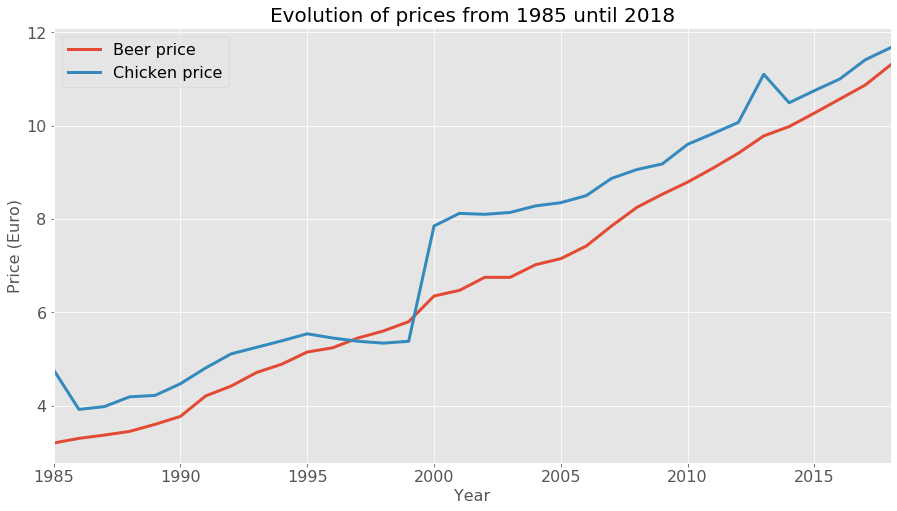

In [0]:
# Plot beer price and chicken price
df_oktoberfest.plot(kind='line', y=['beer_price','chicken_price'], figsize=(15,8), linewidth=3, fontsize=16)

# Title, labels and legend
plt.legend(labels=['Beer price','Chicken price'],fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price (Euro)',fontsize=16)
plt.title('Evolution of prices from 1985 until 2018',fontsize=20)

In [0]:
# Price of a beer and a chicken in 1985
print(df_oktoberfest.loc[1985,['beer_price','chicken_price']].sum())
# 7.97

# Price of a beer and a chicken in 2018
print(df_oktoberfest.loc[2018,['beer_price','chicken_price']].sum())
# 22.97

7.97
22.97


In [0]:
import plotly.graph_objects as go

# Interactive plots of the price of beer and chicken
year = df_oktoberfest.index
beer_price = df_oktoberfest.beer_price
chicken_price = df_oktoberfest.chicken_price

fig = go.Figure()

fig.add_trace(go.Scatter(x=year, y=chicken_price,
                    mode='lines+markers',
                    name='Chicken'))

fig.add_trace(go.Scatter(x=year, y=beer_price,
                    mode='lines+markers',
                    name='Beer'))

# Title, labels, and background
fig.update_layout(title='Evolution of prices from 1985 until 2018',
                   xaxis_title='Year',
                   yaxis_title='Price (Euro)',
                   plot_bgcolor='white')

How did beer consumption change from 1985 till 2018? And chicken consumption? Is there a tendency?
The following plot shows the consumption of beer from 1985 till now.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fe57d5b1588> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Consumption of bier')

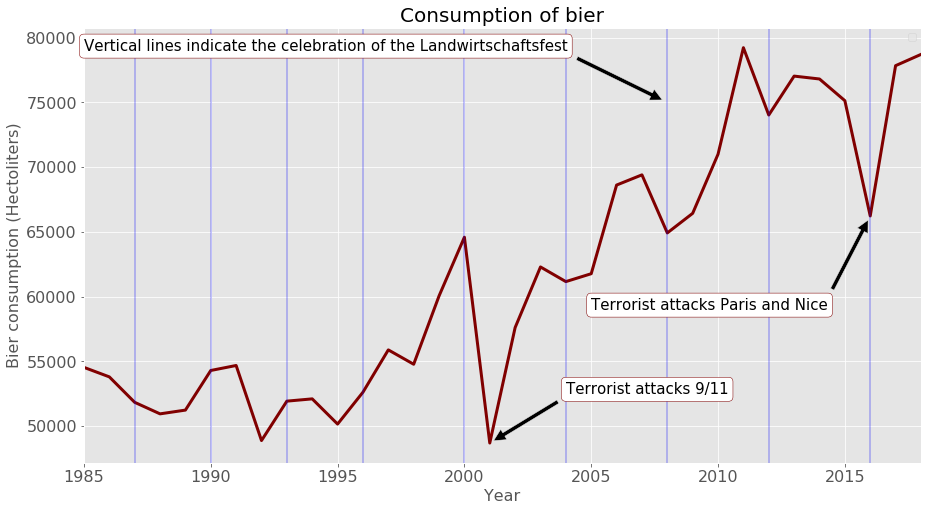

In [0]:
# Plot beer consumption 
df_oktoberfest.plot(y='beer_consumption', figsize=(15,8), linewidth=3, fontsize=16, color='maroon', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest. 
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)



# Annotations - celebration of the landwirtschaftsfest and terrorist attacks  
plt.annotate('Vertical lines indicate the celebration of the Landwirtschaftsfest', xy=(2008, 75000), xytext=(1985, 79000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001,'beer_consumption']), xytext=(2004, 52500), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016,'beer_consumption']), xytext=(2005, 59000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Bier consumption (Hectoliters)',fontsize=16)
plt.title('Consumption of bier',fontsize=20)


As we can observe, the consumption of beer presents a growing trend. The vertical lines indicate the years than the Oktoberfest coincided with the celebration of the Landswirtschaftsfest. This festival is celebrated every four years since 1996 (before every 3) at Theresienwiesen at the same time that Oktoberfest. We can see that small decreases in 2004, 2008, and 2012 could be related to the celebration of this festival. On the contrary, the significant decreases of consumption of beer in 2001 and 2016 could be related to the September 11 terrorist attacks in 2001, the November 2015 Paris terrorist attacks, and the 2016 Nice truck attack. The number of visitors decreased in those years (2001 and 2016), showing the lowest values since 1985.

In [0]:
# Lowest number of visitors since 1985 in 2001,2016, and 1988. 
df_oktoberfest.visitors_total.sort_values().head(3)

year
2001    5.5
2016    5.6
1988    5.7
Name: visitors_total, dtype: float64

The following plot represents the consumption of chicken from 1985 till 2018. As we can easily observe, the consumption of chicken presents a decreasing trend, and it was also affected by the terrorist attacks in 2001 and 2016.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fe57ad5d160> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Consumption of chicken')

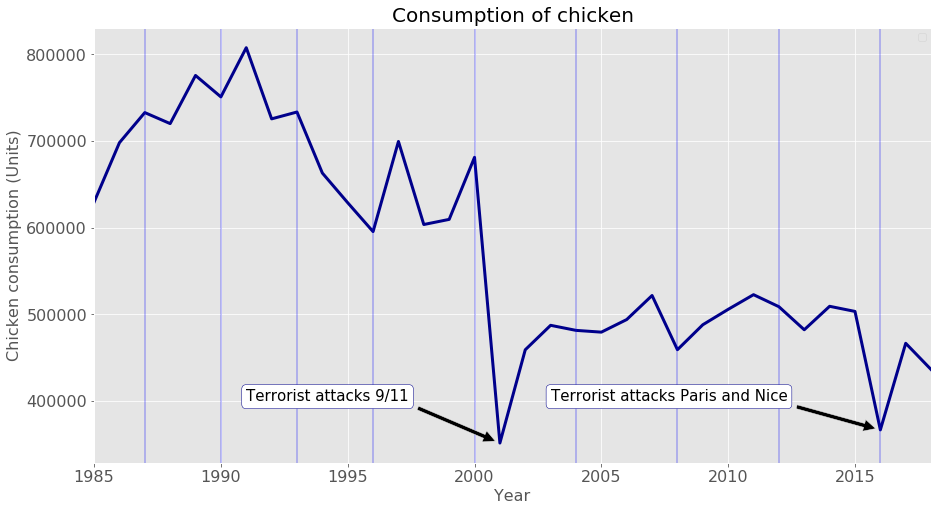

In [0]:
# Plot chicken consumption
df_oktoberfest.plot(y='chicken_consumption', figsize=(15,8), linewidth=3, fontsize=16, color='darkblue', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest. 
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)


# Annotations - terrorist attacks of September 11, Paris and Nice
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001,'chicken_consumption']), xytext=(1991, 400000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="darkblue"),
            )
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016,'chicken_consumption']), xytext=(2003, 400000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="darkblue"),
            )

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Chicken consumption (Units)',fontsize=16)
plt.title('Consumption of chicken',fontsize=20)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fe5794c47f0> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Total number of visitors')

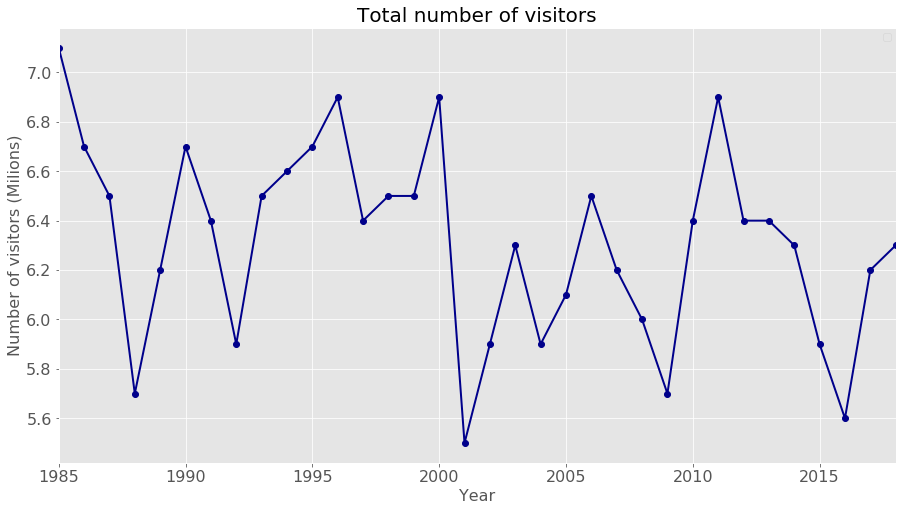

In [0]:
# Plot total number of visitors
df_oktoberfest.plot(y='visitors_total', figsize=(15,8), marker='o', linewidth=2, fontsize=16, color='darkblue', label='_nolegend_')

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of visitors (Milions)',fontsize=16)
plt.title('Total number of visitors',fontsize=20)

The article contains information about 8 different folk festivals in Bavaria. We can easily download the table available in the article by using the pandas.read_html function as follows:


In [0]:
article = pd.read_html('https://www.merkur.de/bayern/so-viel-kostet-mass-auf-bayerischen-volksfesten-7428217.html',header=0)
df_feste = article[0]

df_feste 

,Fest,Termin 2017,Besucher,Veranstalter,Bierpreisbremse,Bierpreis-Entwicklung
0,Bergkirchweih Erlangen,1.6. – 12.6.,"1,3 Mio.",Stadt Erlangen,Nein. Bierpreise für die vielen verschiedenen ...,"2008: 7,00 € 2009: 7,00 € 2010: 7,50 € 2011..."
1,Augsburger Plärrer,14.4. – 1.5. und 25.8. – 10.9.,"insgesamt 1,2 Mio. an beiden Terminen",Stadt Augburg,"Nein, kein Thema. Brauereien teilen den Preis ...","2008: 6,40 € 2009: 6,40 € 2010: 6,70 € 2011..."
2,Barthelmarkt Oberstimm,26.6. - 28.8.,200.000,Markt Manching,Keine Auskunft. Festwirte und Brauereien kalku...,"2008: 6,70 € 2009: 6,90 € 2010: 6,90 € 2011..."
3,Dachauer Volksfest,12.8. - 21.8.,300.000,Stadt Dachau,Nein. Wirte machen alle zwei Jahre der Stadt e...,"2008: 4,40 € 2009: 4,70 € 2010: 4,90 € 2011..."
4,Herbstfest Rosenheim,26.8. - 10.9.,"1,1 Mio.",Wirtschaftlicher Verband Rosenheim,Nicht geplant. Zwei Brauereien sind auf dem He...,"2008: 6,60 € 2009: 6,80 € 2010: 7,40 € 2011..."
5,Gillamoos Abensberg,31.8. - 4.9.,300.000,Stadt Abensberg,"Kein Thema, die auf dem Gillamoos vertretenen ...","2012: 7,90 € 2013: 7,90 € 2014: 8,40 € 2015..."
6,Gäubodenfest Straubing,11.8. - 21.8.,"1,4 Mio.",Ausstellungs- und Veranstaltungs GmbH,Nein. Brauereien kalkulieren den Preis und der...,"2008: 6,80 € 2009: 6,80 € 2010: 7,40 € 2011..."
7,Karpfhamer Fest,31.8. - 5.9.,400.000,Eingetragener Verein,Nein. Absprachen unter den Wirten über den Bie...,"2008: 6,80 € 2009: 6,80 € 2010: 7,40 € 2011..."


The table includes: (1) Name of the festival, (2) Date of the festival, (3) Number of visitors, (4) Organizer, (5) Information about beer price, and (6) Beer price evolution from 2008 until 2016. 

We are only interested in analyzing beer prices, thus we can create a data frame that only contains the prices available in the last column. These prices have to be in different columns, as tidy datasets contain each value placed in its own cell. To extract both years and prices, we use regex expressions and the re.findall(pattern, string, flags=0) function. This function returns all matches of a pattern in a string as a list of strings. Then, we create a dictionary for each festival , where the keys contain the years and the values contain the prices of beer. After creating the dictionaries, we can place them in a list. Finally, we use this list of dictionaries as the argument of the pandas.DataFrame function, obtaining the following data frame.

In [0]:
import re

# Data will be a list of dictionaries
data = []

# Loop through all entries in Bierpreis-Entwicklung (Evolution of beer prices) column
for entry in df_feste['Bierpreis-Entwicklung']:
    # Find all 4-digits patterns
    years = re.findall('\d{4}',entry)
    # Find one or more digits follow by a , and follow by another one or more digits
    prices = re.findall('\d+,\d+',entry)
    
    # Create a dictionary, where years are the keys and prices the values
    dictionary = dict(zip(years,prices))
    # Append this dictionary to the list data
    data.append(dictionary)
    

# Use the list data to create the dataframe
df_feste_price = pd.DataFrame(data,index=df_feste['Fest'])

df_feste_price

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Fest,,,,,,,,,
Bergkirchweih Erlangen,"7,00","7,00","7,50","7,50","7,50","8,00","8,00","8,50","9,00"
Augsburger Plärrer,"6,40","6,40","6,70","6,80","7,30","8,20","8,40","8,40","9,60"
Barthelmarkt Oberstimm,"6,70","6,90","6,90","7,40","7,70","7,90","8,20","8,40","9,40"
Dachauer Volksfest,"4,40","4,70","4,90","4,90","5,10","5,30","5,60","5,60","5,70"
Herbstfest Rosenheim,"6,60","6,80","7,40","7,40","7,80","7,80","8,20","8,40","8,40"
Gillamoos Abensberg,NaN,NaN,NaN,NaN,"7,90","7,90","8,40","8,90","8,90"
Gäubodenfest Straubing,"6,80","6,80","7,40","7,40","7,90","8,10","8,40","8,70","8,90"
Karpfhamer Fest,"6,80","6,80","7,40","7,40","7,90","8,10","8,40","8,70","8,90"


We have to perform a few modifications in the data frame before we visualize it. First, we have to modify the data types of all columns as they must contain floats instead of strings. Then, we have to transpose the data frame, since data frame indexes are by default the x axis of the plot, and each column of the data frame represents different lines in the visualization. Finally, we include the price of beer at Oktoberfest from 2008 till 2016.

In [0]:
# Modify the data type of all columns
for year in map(str,range(2008,2017)):
    df_feste_price[year] = df_feste_price[year].str.replace(',','.').astype(float)

# Transpose the dataframe
df_feste_price = df_feste_price.transpose()

# Include price of beer at Oktoberfest from 2008 till 2016
df_feste_price['Oktoberfest'] = list(df_oktoberfest.loc[2008:2016,'beer_price'])

df_feste_price

Fest,Bergkirchweih Erlangen,Augsburger Plärrer,Barthelmarkt Oberstimm,Dachauer Volksfest,Herbstfest Rosenheim,Gillamoos Abensberg,Gäubodenfest Straubing,Karpfhamer Fest,Oktoberfest
2008,7.0,6.4,6.7,4.4,6.6,NaN,6.8,6.8,8.25
2009,7.0,6.4,6.9,4.7,6.8,NaN,6.8,6.8,8.53
2010,7.5,6.7,6.9,4.9,7.4,NaN,7.4,7.4,8.79
2011,7.5,6.8,7.4,4.9,7.4,NaN,7.4,7.4,9.09
2012,7.5,7.3,7.7,5.1,7.8,7.9,7.9,7.9,9.41
2013,8.0,8.2,7.9,5.3,7.8,7.9,8.1,8.1,9.78
2014,8.0,8.4,8.2,5.6,8.2,8.4,8.4,8.4,9.98
2015,8.5,8.4,8.4,5.6,8.4,8.9,8.7,8.7,10.27
2016,9.0,9.6,9.4,5.7,8.4,8.9,8.9,8.9,10.57


Now, we are ready to visualize the evolution of prices at different festivals across Bavaria. As we can observe, the prices of beer are also increasing at other festivals across Bavaria. However, the prices at Oktoberfest are higher than at other folk festivals, being Dachauer Volksfest the most economical one.

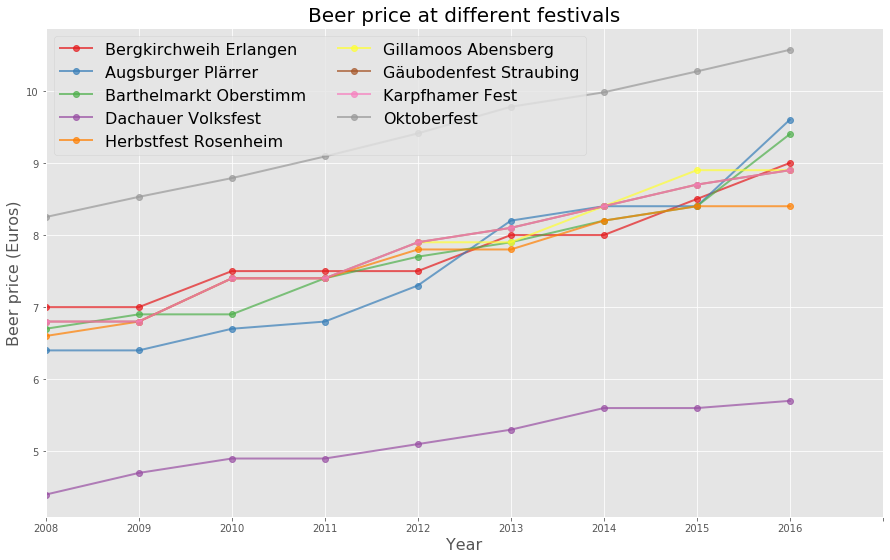

In [0]:
import numpy as np
df_feste_price.plot(figsize=(15,9), cmap=plt.get_cmap('Set1'), marker='o', linewidth=2, alpha=0.7)

# Xticks
plt.xticks(np.arange(10), df_feste_price.index)
# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Beer price (Euros)',fontsize=16)
plt.title('Beer price at different festivals',fontsize=20)
plt.legend(loc='best',ncol=2,fontsize=16)

In [0]:
import plotly.graph_objects as go

# Interactive plots of the price of beer and chicken
year = df_feste_price.index

fig = go.Figure()

for column in df_feste_price.columns:
    fig.add_trace(go.Scatter(x=year, y=df_feste_price[column],
                        mode='lines+markers',
                        name=column,
                        hoverinfo="y"))

# Title and labels
fig.update_layout(title='Evolution of prices from 2008 until 2016 at beer festivals in Bavaria',
                   xaxis_title='Year',
                   yaxis_title='Price (Euro)',
                   plot_bgcolor='white')

In [0]:
# Percentage change between the year and the prior year
price_pct_change = df_feste_price.pct_change()

# Calculate the mean percentage of change 
price_pct_change.loc['mean'] = price_pct_change.mean(axis=0)

price_pct_change

Fest,Bergkirchweih Erlangen,Augsburger Plärrer,Barthelmarkt Oberstimm,Dachauer Volksfest,Herbstfest Rosenheim,Gillamoos Abensberg,Gäubodenfest Straubing,Karpfhamer Fest,Oktoberfest
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.000000,0.000000,0.029851,0.068182,0.030303,NaN,0.000000,0.000000,0.033939
2010,0.071429,0.046875,0.000000,0.042553,0.088235,NaN,0.088235,0.088235,0.030481
2011,0.000000,0.014925,0.072464,0.000000,0.000000,NaN,0.000000,0.000000,0.034130
2012,0.000000,0.073529,0.040541,0.040816,0.054054,NaN,0.067568,0.067568,0.035204
2013,0.066667,0.123288,0.025974,0.039216,0.000000,0.000000,0.025316,0.025316,0.039320
2014,0.000000,0.024390,0.037975,0.056604,0.051282,0.063291,0.037037,0.037037,0.020450
2015,0.062500,0.000000,0.024390,0.000000,0.024390,0.059524,0.035714,0.035714,0.029058
2016,0.058824,0.142857,0.119048,0.017857,0.000000,0.000000,0.022989,0.022989,0.029211
mean,0.032427,0.053233,0.043780,0.033153,0.031033,0.030704,0.034607,0.034607,0.031474


The table shows that prices increase more evenly at Oktoberfest than at other folk festivals, showing an increment around 3% every year. Other folk festivals present less uniform price increments; however, the increments are some years much larger than those at Oktoberfest.
Plotly allows to make animated scatter plots on maps so that we can visualize not only beer prices in different years, but also where the different folk festivals are located. First, we have to include in the dataframe the latitude and longitude of the cities where the festivals are celebrated. It would be more accurate to include the exact latitude and longitude of the festival grounds, but for this visualization the latitude and longitude of the city is a pretty good approximation.
To obtain both the latitude and the longitude of the cities we employ geopy. After obtaining the location of the cities, we include this information in the previously created data frame. We have to transpose again the data frame, since we want the festivals to be the index of the frame.

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

latitude = []
longitude =[]
cities = ['Erlangen','Augsburg','Oberstimm','Dachau','Rosenheim','Abensberg','Straubing','Karpfham','Munich']

# Find the latitude and longitude of the different cities using geolocator
for city in cities:
    location = geolocator.geocode(city)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

# Transpose again the data frame df_feste_price, since we want the festivals to be the index of the dataframe
df_feste_price = df_feste_price.transpose()
# Create a dataframe using the lists created before - latitude and longitude
df_locations = pd.DataFrame({'latitude':latitude, 'longitude':longitude}, index=df_feste_price.index)

# Concatenate both data frames 
df_feste_locations = pd.concat([df_feste_price, df_locations],axis=1)

df_feste_locations

NameError: ignored

In [0]:
location = geolocator.geocode('Malibu')
latitudeM = location.latitude
longitudeM = location.longitude
longitudeM

-118.689423

In [0]:
# Melt the dataframe 
data = pd.melt(df_feste_locations.reset_index(),
               id_vars=['Fest','latitude','longitude'], 
               value_vars=list(map(str,range(2008,2017))),
               var_name= 'year' , value_name='price', )

# Drop rows with null values
data.dropna(inplace=True)

# Visualize the first 10 rows
data.head(10)

,Fest,latitude,longitude,year,price
0,Bergkirchweih Erlangen,49.598119,11.003645,2008,7.00
1,Augsburger Plärrer,48.366804,10.898697,2008,6.40
2,Barthelmarkt Oberstimm,48.712309,11.456664,2008,6.70
3,Dachauer Volksfest,48.259248,11.435442,2008,4.40
4,Herbstfest Rosenheim,47.848272,12.115972,2008,6.60
6,Gäubodenfest Straubing,48.881980,12.569716,2008,6.80
7,Karpfhamer Fest,48.419987,13.214208,2008,6.80
8,Oktoberfest,48.137108,11.575382,2008,8.25
9,Bergkirchweih Erlangen,49.598119,11.003645,2009,7.00
10,Augsburger Plärrer,48.366804,10.898697,2009,6.40


In [0]:
import plotly.express as px

# Create a token in mapbox
token = 'pk.eyJ1IjoiYXJhc2h2YWZhIiwiYSI6ImNrMmZmdndhdzBqcXozY28wbTU5aWZuZG4ifQ.FeAQ1mr1XMJ-24hXXJJ4vg'

# Create a scatter map plot. The size of the points represents the price
fig = px.scatter_mapbox(data,
        lat = 'latitude',
        lon = 'longitude',
        zoom=6,
        hover_name='Fest',       
        size='price',
        color='price',
        animation_frame='year',
        color_continuous_scale=px.colors.sequential.Viridis,
        )
# Configure the style of the map
fig.update_layout(
        mapbox_style="light", 
        mapbox_accesstoken=token
    )
fig.show()

In [0]:
article = pd.read_html('https://www.oktoberfesttours.travel/oktoberfest-2019/beer-prices/',header=0)
df_brand_prices = article[0]

# Large tents prices at Oktoberfest 2019
large_tents = df_brand_prices.iloc[0:13,:]

# Change columns names
large_tents.rename(columns=lambda x:x.lower().replace(' ','_'), inplace=True)

# Change columns types - convert strings in floats
for column in large_tents.columns[1:]:
    large_tents[column] = large_tents[column].str.extract(r'(\d+.\d+)').astype(float)

# Set index of the data frame --> large tents
large_tents.set_index('large_tents', inplace=True)

# Clean dataframe
large_tents

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2019_price,2018_price,increase
large_tents,,,
Armbrustschützenzelt,11.70,11.40,2.63
Augustiner-Festhalle,11.40,11.10,2.70
Bräurosl,11.80,11.40,3.51
Fischer-Vroni,11.70,11.35,3.08
Hacker-Festzelt,11.80,11.40,3.51
Hofbräu-Festzelt,11.70,11.40,2.63
Käfer Wiesnschänke,11.80,11.50,2.61
Löwenbräu-Festzelt,11.80,11.50,2.61
Marstall,11.80,11.50,2.61


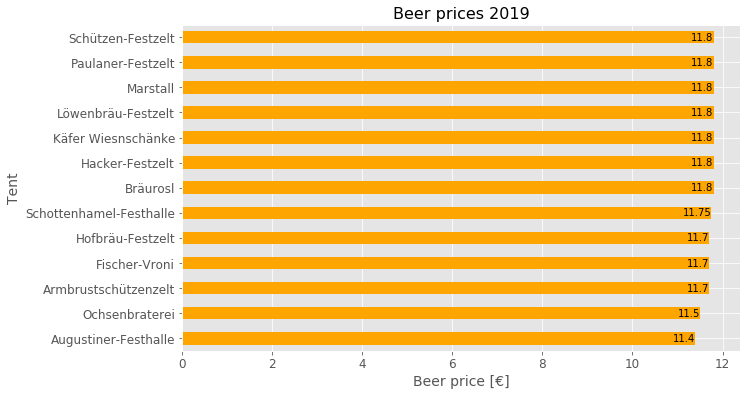

In [0]:
# Plot beer prices 2019
large_tents['2019_price'].sort_values().plot(figsize=(10,6),kind='barh',color='orange',fontsize=12)

# labels and title
plt.title('Beer prices 2019', fontsize=16)
plt.xlabel('Beer price [€]', fontsize=14)
plt.ylabel('Tent', fontsize=14)

# Text with the prices
for i,price in enumerate(large_tents['2019_price'].sort_values()):
    plt.text(x=price,y=i,s=str(price),horizontalalignment='right',verticalalignment='center')

Prediction of prices for 2030
The rise in prices follows a linear trend (more accurate in beer prices). Therefore, we can create a linear regression model to predict both prices (chicken and beer) in 2030. To do so, we can use the linear regression model available in scikit-learn library as follows:


In [0]:
from sklearn.linear_model import LinearRegression

# Prediction of beer price
# Create a LinearRegression object
beer_regression = LinearRegression()

# Fit the model 
beer_regression.fit(X=np.array(df_oktoberfest.index).reshape(-1, 1),y=df_oktoberfest.beer_price)

# Prediction using the linear model
print('Predicted beer price in 2030: {:0.3f}€'.format(beer_regression.predict(np.array([[2030]]))[0]))
# Predicted beer price in 2030: 13.781€


# Prediction of chicken price
# Create a LinearRegression object
chicken_regression = LinearRegression()

# Fit the model
chicken_regression.fit(X=np.array(df_oktoberfest.index).reshape(-1,1), y=df_oktoberfest.chicken_price)

# Prediction using the linear model
print('Predicted chicken price in 2030: {:0.3f}€'.format(chicken_regression.predict(np.array([[2030]]))[0]))
# Predicted chicken price in 2030: 14.550€

Predicted beer price in 2030: 13.781€
Predicted chicken price in 2030: 14.550€


Key Takeaways
The prices of beer and chicken at Oktoberfest are increasing steadily over last 30 years.
Visitors drink more and eat less. The consumption of beer shows an increasing trend over the years. On the contrary, the consumption of chicken is decreasing. The consumption was affected by the terrorist attacks in 2001 and 2016. Those years, fewer people visited the festival.
The number of visitors does not follow any trend, ranging from 5.5 to 7.1.
The prices of beer are also increasing at other folk festivals across Bavaria. The prices at Dachauer Volksfest are half of those at Oktoberfest. If you want to get drunk and don’t be broken go to Dachau. 😆 It is near Munich!
Beer price at Oktoberfest is increasing around 3% every year since 2008. The prices at other folk festivals across Bavaria are increasing less uniformly; however, some years the increment is much larger than at Oktoberfest.
Larger tents at Oktoberfest offer beer prices between 11.4€ and 11.8€ this year.
The price of a meal at Oktoberfest (beer+chicken) will be around 28€ in 2030 if prices continue increasing.